In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import random, os, shutil
import copy
import imageio
import PIL
import numpy as np

#Extracción de la base de datos
local_zip = '/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Scenas_Intel')
zip_ref.close()

# **Renombramos las clases de la base de datos**

In [ ]:
# Se renombran las clases originales para mayor y mejor gestión de los datos/imagenes
# para el conjunto de entrenamiento

for i in range(1,7):
  if i == 1:
    os.rename('Scenas_Intel/seg_train/seg_train/buildings', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))
  elif i == 2:
    os.rename('Scenas_Intel/seg_train/seg_train/forest', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))
  elif i == 3:
    os.rename('Scenas_Intel/seg_train/seg_train/glacier', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))
  elif i == 4:
    os.rename('Scenas_Intel/seg_train/seg_train/mountain', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))
  elif i == 5:
    os.rename('Scenas_Intel/seg_train/seg_train/sea', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))
  elif i == 6:
    os.rename('Scenas_Intel/seg_train/seg_train/street', 'Scenas_Intel/seg_train/seg_train/clase0{}'.format(i))

In [ ]:
# Se renombran las clases originales para mayor y mejor gestión de los datos/imagenes
# para el conjunto de validación

for i in range(1,7):
  if i == 1:
    os.rename('Scenas_Intel/seg_test/seg_test/buildings', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))
  elif i == 2:
    os.rename('Scenas_Intel/seg_test/seg_test/forest', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))
  elif i == 3:
    os.rename('Scenas_Intel/seg_test/seg_test/glacier', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))
  elif i == 4:
    os.rename('Scenas_Intel/seg_test/seg_test/mountain', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))
  elif i == 5:
    os.rename('Scenas_Intel/seg_test/seg_test/sea', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))
  elif i == 6:
    os.rename('Scenas_Intel/seg_test/seg_test/street', 'Scenas_Intel/seg_test/seg_test/clase0{}'.format(i))

# **Construcción de los conjuntos de entrenamiento, validación**

**Creación de las carpetas de entrenamiento y prueba iniciales, con sus respectivas carpetas para cada clase**

In [ ]:
datasets = ['train_original', 'test_original']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,7):
    if i < 7:
      dest_set = dataset_name+'/clase0{}/'.format(i)
    os.mkdir(dest_set)

**Asignación de imágenes a cada conjunto**

In [ ]:
# Esta función pasa imagenes de una carpeta a otra
def fill_dataset(src_dataset, dest_dataset, clase_index, limit_low, limit_upper): 

  src_path = src_dataset+'/clase0{}/'.format(clase_index)
  dest_path = dest_dataset+'/clase0{}/'.format(clase_index)
  
  lst = sorted(os.listdir(src_path))
        
  for file_name in lst[limit_low:limit_upper]: 
    if limit_low < limit_upper:
      img_original = imageio.imread(src_path + file_name)
      if limit_low < 10:
          imageio.imwrite(dest_path + '000{}.jpg'.format(limit_low), img_original)
      elif limit_low >= 10 and limit_low < 100:
          imageio.imwrite(dest_path + '00{}.jpg'.format(limit_low), img_original)
      else: 
          imageio.imwrite(dest_path + '0{}.jpg'.format(limit_low), img_original)
              
      limit_low = limit_low + 1

In [ ]:
#Revisar longitud de las clases
import os
for i in range(1,7):
  if i < 7:
    print('total images in Scenass_Intel/seg_train/seg_train/clase0{}:'.format(i), len(os.listdir('Scenas_Intel/seg_train/seg_train/clase0{}/'.format(i))))
    print('total images in Scenas_Intel/seg_test/seg_test/clase0{}:'.format(i), len(os.listdir('Scenas_Intel/seg_test/seg_test/clase0{}/'.format(i))))


total images in Scenass_Intel/seg_train/seg_train/clase01: 2191
total images in Scenas_Intel/seg_test/seg_test/clase01: 437
total images in Scenass_Intel/seg_train/seg_train/clase02: 2271
total images in Scenas_Intel/seg_test/seg_test/clase02: 474
total images in Scenass_Intel/seg_train/seg_train/clase03: 2404
total images in Scenas_Intel/seg_test/seg_test/clase03: 553
total images in Scenass_Intel/seg_train/seg_train/clase04: 2512
total images in Scenas_Intel/seg_test/seg_test/clase04: 525
total images in Scenass_Intel/seg_train/seg_train/clase05: 2274
total images in Scenas_Intel/seg_test/seg_test/clase05: 510
total images in Scenass_Intel/seg_train/seg_train/clase06: 2382
total images in Scenas_Intel/seg_test/seg_test/clase06: 501


In [ ]:
#clase01
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 1, 0, 2191)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 1, 0, 437)

#clase02
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 2, 0, 2271)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 2, 0, 474)

#clase03
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 3, 0, 2404)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 3, 0, 553)

#clas04
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 4, 0, 2512)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 4, 0, 525)

#clase05
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 5, 0, 2274)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 5, 0, 510)

#clase06
fill_dataset('Scenas_Intel/seg_train/seg_train','train_original', 6, 0, 2382)
fill_dataset('Scenas_Intel/seg_test/seg_test','test_original', 6, 0, 501)

In [ ]:
# Comprobación de que los conjuntos de entrenamiento y validación para crear el modelo
# se han creado correctamente
import os
for i in range(1,7):
  if i < 7:
    print('total images in train_original/clase0{}:'.format(i), len(os.listdir('train_original/clase0{}/'.format(i))))
    print('total images in test_original/clase0{}:'.format(i), len(os.listdir('test_original/clase0{}/'.format(i))))


total images in train_original/clase01: 2191
total images in test_original/clase01: 437
total images in train_original/clase02: 2271
total images in test_original/clase02: 474
total images in train_original/clase03: 2404
total images in test_original/clase03: 553
total images in train_original/clase04: 2512
total images in test_original/clase04: 525
total images in train_original/clase05: 2274
total images in test_original/clase05: 510
total images in train_original/clase06: 2382
total images in test_original/clase06: 501


**Referenciamos los conjuntos de entrenamiento, validación y prueba**

In [ ]:
# Se referencia los conjuntos de entrenamiento, validación y pruebas con sus rutas
train_dir = os.path.join('train_original')
validation_dir = os.path.join('test_original')
# test_dir = os.path.join('test')

**Carga de la arquitectura VGG16**

In [ ]:
# Se define la arquitectura que se va a utilizar
# en esta caso se utilizará Transfer Learninig VGG16
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas(Fine Tunning)**

In [ ]:
# Para este caso se congelan las primeras 4 capas o lo primeros 4 bloques
# y nos quedamos con las úlitmas capas del úlitmo bloque activo

for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# **Construcción de la CNN**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base) # Se agrega la parte convolucional
model.add(layers.MaxPooling2D((2, 2))) # Se añade un capa MaxPooling
model.add(layers.BatchNormalization()) # y se agrega una capa para normalizar
model.add(layers.Flatten()) # Se aplana todo
model.add(layers.Dense(6, activation='softmax')) # y para finalizar se agrega una capa de salida con 6 neuronas

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 14,729,030
Trainable params: 7,092,742
Non-trainable params: 7,636,288
_________________________________________________________________


# **Compilación**

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc']) # acc -> accuracy

# **Definición de los generadores**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Sirve para acceder y manipular las instancias de la base de datos

#Todas las imágenes se normalizan en el rango de [0,1]
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Carpeta del conjunto de entrenamiento
        train_dir,
        # Las imágenes se redimensionan a 150 X 150
        target_size=(150, 150),
        batch_size=4,
        #Mediante el argumento class_mode, se define el tipo de clasificación que se llevará a cabo. En este caso, es clasificación binaria.
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# **Entrenamiento**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/intel.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(
      train_generator, #Conjunto de entrenamiento
      steps_per_epoch=250, #Número de veces que se tomarán 20 (batch_size) lotes de imágenes
      epochs=35,
      validation_data=validation_generator,
      validation_steps=3000, callbacks = [mc])

Epoch 1/35
250/250 [==============================] - 108s 309ms/step - loss: 0.8169 - acc: 0.7040 - val_loss: 0.8812 - val_acc: 0.7430

Epoch 00001: val_acc improved from -inf to 0.74300, saving model to /content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/intel.h5
Epoch 2/35
250/250 [==============================] - 77s 309ms/step - loss: 0.6518 - acc: 0.7820 - val_loss: 0.7385 - val_acc: 0.7763

Epoch 00002: val_acc improved from 0.74300 to 0.77633, saving model to /content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/intel.h5
Epoch 3/35
250/250 [==============================] - 77s 310ms/step - loss: 0.5572 - acc: 0.8100 - val_loss: 0.5660 - val_acc: 0.8340

Epoch 00003: val_acc improved from 0.77633 to 0.83400, saving model to /content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/intel.h5
Epoch 4/35
250/250 [==============================] - 77s 309ms/step - loss: 0.4806 - acc: 0.8480 - val_loss: 0.6345 - val_acc: 0.8167

Epoch 00004: val_acc did not 

# **Curvas de precisión y pérdida**

Mejor época (exactitud)  31
Mejor época (pérdida)  28


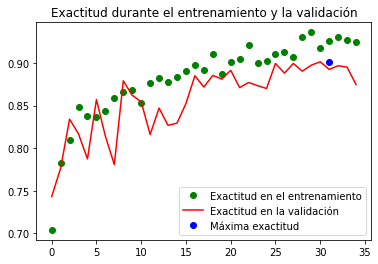

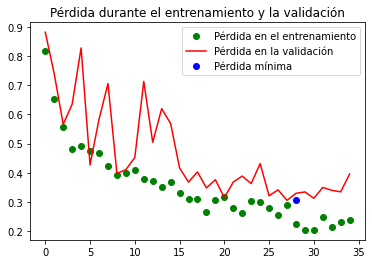

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Exactitud en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Exactitud en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Máxima exactitud')
plt.title('Exactitud durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (exactitud) ', max_val_acc_epoch)
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Pérdida mínima')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print('Mejor época (pérdida) ', min_val_loss_epoch)

plt.show()

In [ ]:
#Cargamos el modelo
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/G3_AI_Lab_School/Examen_Extraordinario/intel.h5', compile = True)

# **Evaluación del modelo final**

In [ ]:
#Test stage
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
# Se evalua el modelo con model_evaluate
val_loss, val_acc = model.evaluate(validation_generator, steps=3000, workers=0, max_queue_size=0)
print('Rate: ', val_acc)

3000/3000 [==============================] - 73s 24ms/step - loss: 0.3124 - acc: 0.9013
Rate:  0.9013333320617676


# **Predicciones**

In [ ]:
# Se tiene que modificar la imagen al formato adecuado en este caso a un tensor
# para hacer las predicciones
import numpy as np
from PIL import Image

width = 150
height = 150
image = Image.open('test_original/clase03/0006.jpg')
image = image.resize((width, height), Image.ANTIALIAS)
image = np.array(image)
image = image / 255.0
image = np.expand_dims(image, axis = 0)
image = np.expand_dims(image, axis = -1)
image = np.stack((image[:,:,:,0], image[:,:,:,0], image[:,:,:,0]), axis=3)
print(image.shape)
prediction = model.predict(image)
print('La imagen pertenece a la clase', np.argmax(prediction)+1)

(1, 150, 150, 3, 1)
La imagen pertenece a la clase 3


In [ ]:
# Se tienne dos listas vacias
predictions = [] # Las predicciones que arroja el modelo
labels = [] # y las etiquetas son los valores reales o el objetivo

for individual in range(1,7):
  if (individual) < 7:
    clas_ind = 'clase0{}/'.format(individual)


  for index in range(0, len(os.listdir('test_original/'+clas_ind))):
    width = 150
    height = 150
    if index < 10:
      image_intel = Image.open('test_original/'+clas_ind+'000{}.jpg'.format(index))
    elif index >= 10 and index < 100:
      image_intel = Image.open('test_original/'+clas_ind+'00{}.jpg'.format(index))
    else:
      image_intel = Image.open('test_original/'+clas_ind+'0{}.jpg'.format(index))

    image_intel = image_intel.resize((width, height), Image.ANTIALIAS)
    image_intel = np.array(image_intel)
    image_intel = image_intel / 255.0
    image_intel = np.expand_dims(image_intel, axis = 0)
    image_intel = np.expand_dims(image_intel, axis = -1)
    image_intel = np.stack((image_intel[:,:,:,0], image_intel[:,:,:,0], image_intel[:,:,:,0]), axis=3)
    prediction = model.predict(image_intel)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual)

## **Evaluación del desempeño mediante *matriz* de confusión y F1**

**Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(labels, predictions) # Se envían ala función loas labels = Valores reales y predictions = valores arrojados por el modelo
print(mcm)

[[361   0   2   0   3  71]
 [  1 454  10   1   2   6]
 [  1   0 480  36  27   9]
 [  1   5 135 325  45  14]
 [  2   2  30  14 452  10]
 [ 16   2   1   0   1 481]]


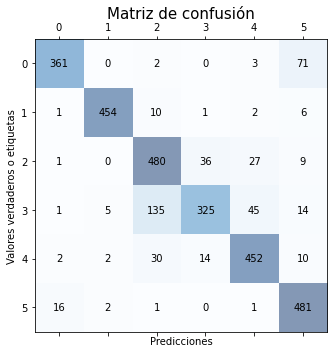

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mcm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(mcm.shape[0]):
  for j in range(mcm.shape[1]):
      ax.text(x=j, y=i, s=mcm[i, j], va='center', ha='center')

plt.title("Matriz de confusión",fontsize=15)
#plt.title('f model: T= %d' % (t))
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 0.8643563
Recall: 0.8528813
F1: 0.8524917
